**Assignment 5 - Rajshri Ganesh Iyer**

**Dataset** **used**: Breast Cancer Wisconsin Dataset (Diagnostic)

**Link to Dataset** https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

**Link to Kaggle Dataset**: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [220]:
#Reading the csv as a dataframe
bc_df = pd.read_csv('/content/data.csv')
bc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [221]:
#replacing Malignant with 1 and Benign with 0 in the data frame
bc_df['diagnosis'] = bc_df['diagnosis'].replace('M', 1)
bc_df['diagnosis'] = bc_df['diagnosis'].replace('B', 0)
bc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [222]:
#Printing Row and Column Info
print(f'row information: {bc_df.index}')
print(f'col information: {bc_df.columns}')

row information: RangeIndex(start=0, stop=569, step=1)
col information: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [223]:
# Dropping Standard Error Values and Worst values for the 10 physical features, and only retaining Mean values
columns_to_delete = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
bc_df = bc_df.drop(columns=columns_to_delete)

In [224]:
#Printing updated row and columnn information
print(f'row information: {bc_df.index}')
print(f'col information: {bc_df.columns}')

row information: RangeIndex(start=0, stop=569, step=1)
col information: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


In [225]:
#Printing the count, mean, min, max, std deviation, percentiles for each feature
bc_df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [226]:
#Calculating and printing the correlation matrix for all the features
correlation_matrix = bc_df.corr()
print(correlation_matrix)

                              id  diagnosis  radius_mean  texture_mean  \
id                      1.000000   0.039769     0.074626      0.099770   
diagnosis               0.039769   1.000000     0.730029      0.415185   
radius_mean             0.074626   0.730029     1.000000      0.323782   
texture_mean            0.099770   0.415185     0.323782      1.000000   
perimeter_mean          0.073159   0.742636     0.997855      0.329533   
area_mean               0.096893   0.708984     0.987357      0.321086   
smoothness_mean        -0.012968   0.358560     0.170581     -0.023389   
compactness_mean        0.000096   0.596534     0.506124      0.236702   
concavity_mean          0.050080   0.696360     0.676764      0.302418   
concave points_mean     0.044158   0.776614     0.822529      0.293464   
symmetry_mean          -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean -0.052511  -0.012838    -0.311631     -0.076437   

                        perimeter_mea

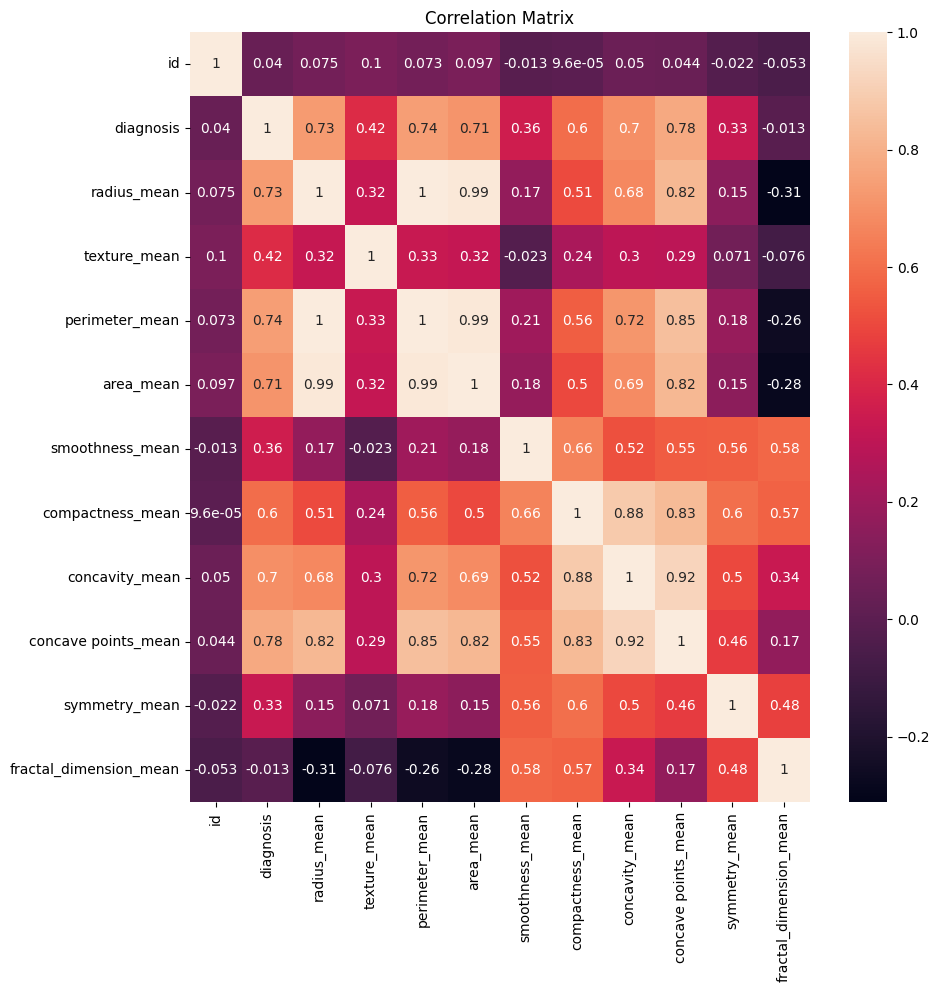

In [227]:
#Plotting the Correlation Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x1000 with 0 Axes>

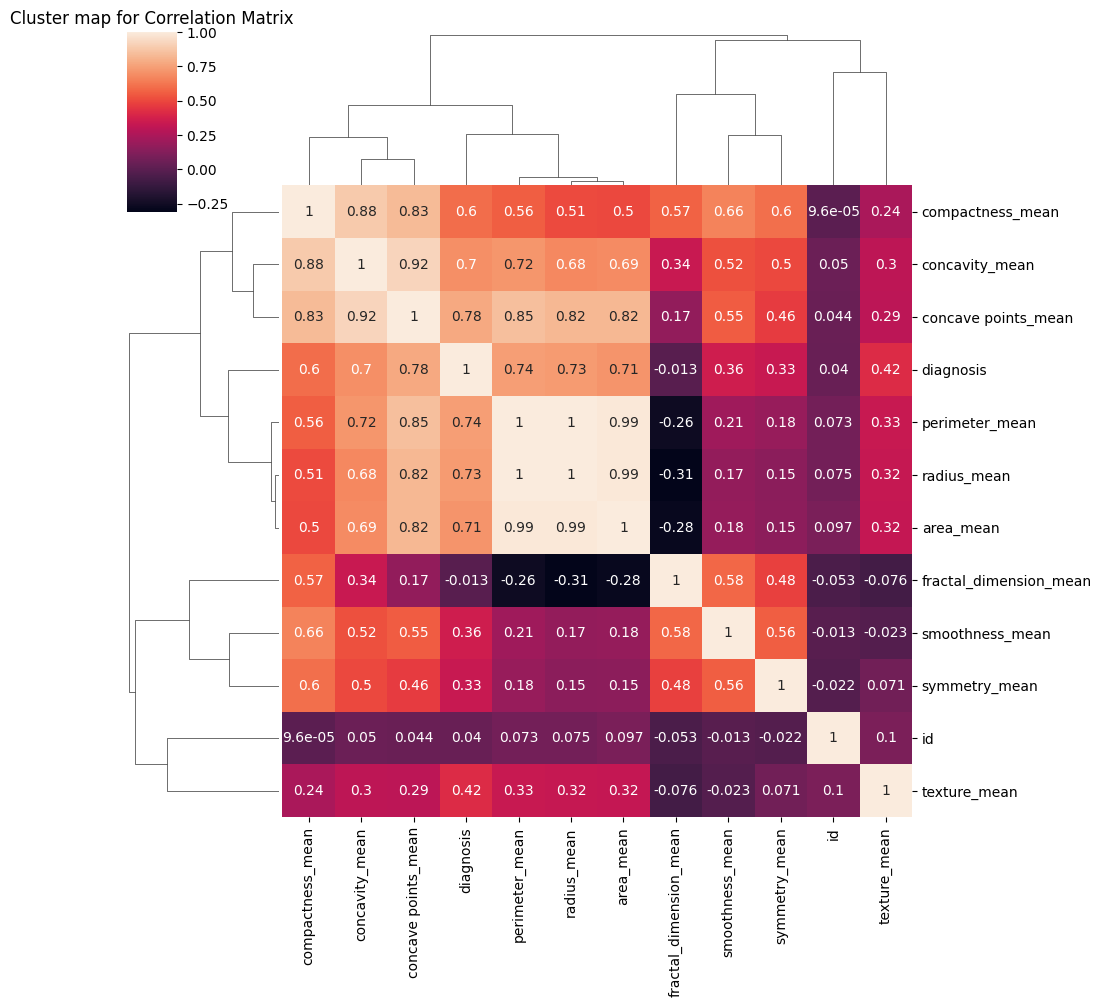

In [228]:
#Plotting a Cluster map for the Correlation Matrix for better visualization"
plt.figure(figsize=(10, 10))
sns.clustermap(correlation_matrix, annot=True)
plt.title('Cluster map for Correlation Matrix')
plt.show()

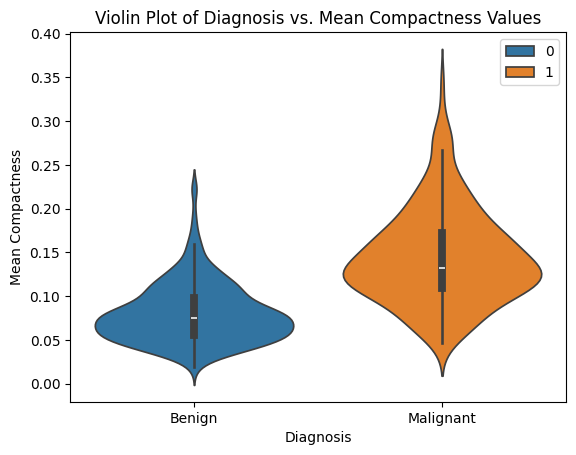

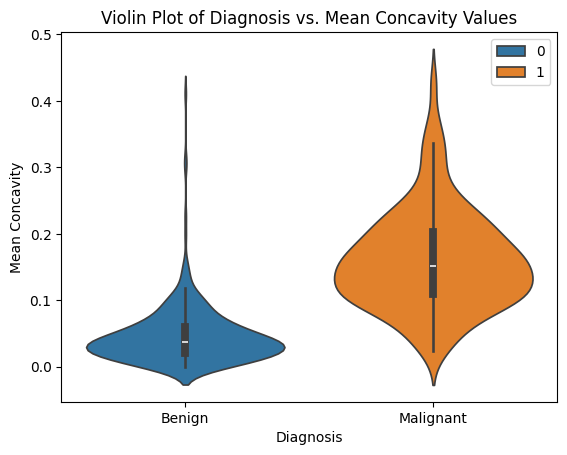

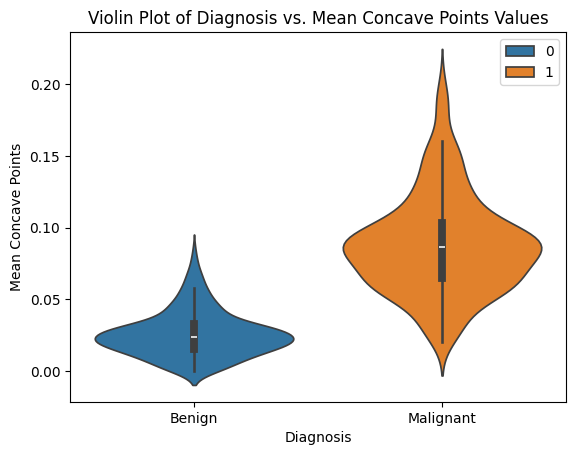

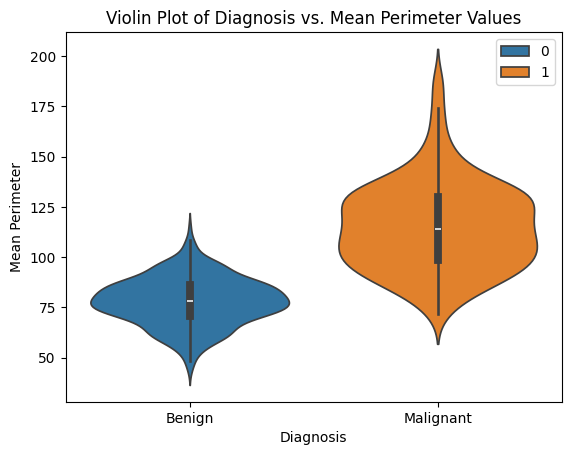

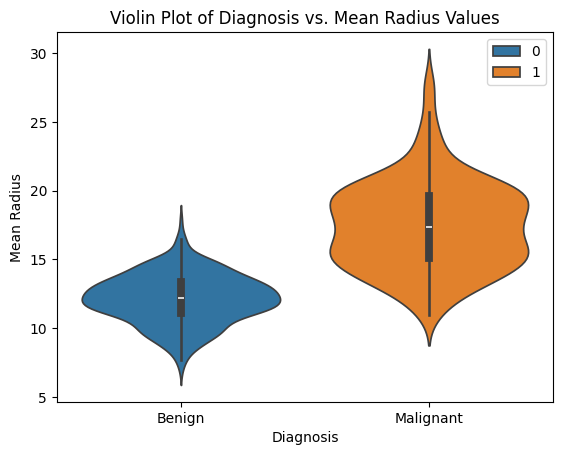

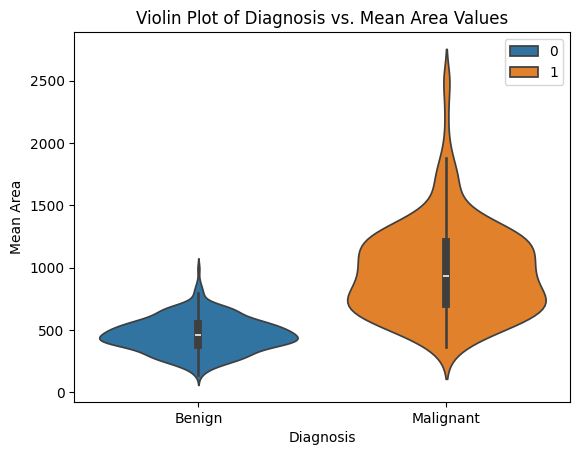

In [229]:
#Plotting Violin Plots for the features that showed high correlation with diagnosis

#Violin Plot of Diagnosis vs. Mean Compactness Values
sns.violinplot(data=bc_df, x='diagnosis', y='compactness_mean', hue='diagnosis')
plt.legend(loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Compactness')
plt.title('Violin Plot of Diagnosis vs. Mean Compactness Values')
plt.show()

#Violin Plot of Diagnosis vs. Mean Concavity Values
sns.violinplot(data=bc_df, x='diagnosis', y='concavity_mean', hue='diagnosis')
plt.legend(loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Concavity')
plt.title('Violin Plot of Diagnosis vs. Mean Concavity Values')
plt.show()

#Violin Plot of Diagnosis vs. Mean Concave Points Values
sns.violinplot(data=bc_df, x='diagnosis', y='concave points_mean', hue='diagnosis')
plt.legend(loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Concave Points')
plt.title('Violin Plot of Diagnosis vs. Mean Concave Points Values')
plt.show()

#Violin Plot of Diagnosis vs. Mean Perimeter Values
sns.violinplot(data=bc_df, x='diagnosis', y='perimeter_mean', hue='diagnosis')
plt.legend(loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Perimeter')
plt.title('Violin Plot of Diagnosis vs. Mean Perimeter Values')
plt.show()

#Violin Plot of Diagnosis vs. Mean Radius Values
sns.violinplot(data=bc_df, x='diagnosis', y='radius_mean', hue='diagnosis')
plt.legend(loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.title('Violin Plot of Diagnosis vs. Mean Radius Values')
plt.show()

#Violin Plot of Diagnosis vs. Mean Area Values
sns.violinplot(data=bc_df, x='diagnosis', y='area_mean', hue='diagnosis')
plt.legend(loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Area')
plt.title('Violin Plot of Diagnosis vs. Mean Area Values')
plt.show()

In [230]:
#Step 1 - Reading Feature Names as X and target name as y
X = bc_df[['compactness_mean','concavity_mean','concave points_mean','perimeter_mean','radius_mean','area_mean']] #feature names
y = bc_df['diagnosis'] #target name

In [232]:
#Step 2 - Splitting data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
#Step 3 - Using a Linear Regression model for fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [234]:
#Step 5 - Predicting the y values
y_pred = model.predict(X_test)

In [236]:
#Step 6 - Evaluating the Linear Regression model - R2, MSE, model intercept and coeff
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print(f'b0 (model intercept)         = {model.intercept_}')
print(f'b1 (coeff for compactness)   = {model.coef_[0]}')
print(f'b2 (coeff for concavity)     = {model.coef_[1]}')
print(f'b3 (coeff for concave points)= {model.coef_[2]}')
print(f'b4 (coeff for perimeter)     = {model.coef_[3]}')
print(f'b5 (coeff for radius)        = {model.coef_[4]}')
print(f'b6 (coeff for area)          = {model.coef_[5]}')



Mean squared error: 0.08494739844208647
R-squared: 0.6383962036838009
b0 (model intercept)         = -1.3346645166241813
b1 (coeff for compactness)   = 0.4225071269807399
b2 (coeff for concavity)     = 0.6485696045302635
b3 (coeff for concave points)= 8.470875669627944
b4 (coeff for perimeter)     = -0.05294643956330038
b5 (coeff for radius)        = 0.4769109453062004
b6 (coeff for area)          = -0.0010274395335266862


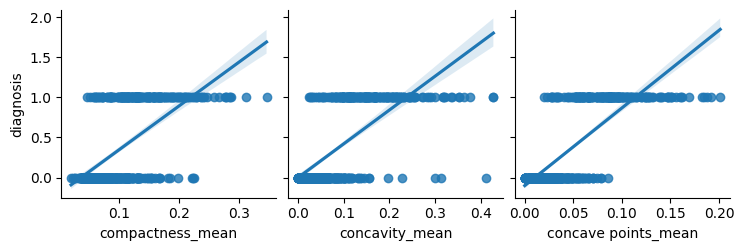

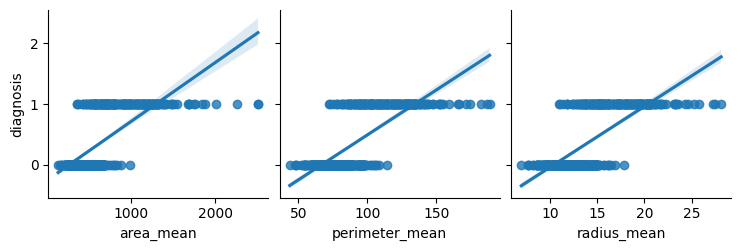

In [216]:
#Plotting the regression lines for the 6 features used for Linear Regression model
sns.pairplot(bc_df, x_vars=['compactness_mean', 'concavity_mean', 'concave points_mean'], y_vars="diagnosis", kind="reg")
plt.show()
sns.pairplot(bc_df, x_vars=['area_mean', 'perimeter_mean', 'radius_mean'], y_vars="diagnosis", kind="reg")
plt.show()